In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
housing = pd.read_csv('./data/train.csv')

## Understand the Data Structure

In [3]:
# Get column names of the df
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

How many attributes do we have in total

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

We have a column called `Id` which is not useful as an attribute. We are going to drop that column because indexes of houses are not relevant for this problem anyway.

In [ ]:
housing = housing.drop("Id", axis=1)
housing.info()

### Numerical Attributes

In [6]:
housing.select_dtypes(exclude=['object']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
housing.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

count       mean       std      min        25%       50%  \
Id             1460.0     730.50    421.61      1.0     365.75     730.5   
MSSubClass     1460.0      56.90     42.30     20.0      20.00      50.0   
LotFrontage    1201.0      70.05     24.28     21.0      59.00      69.0   
LotArea        1460.0   10516.83   9981.26   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.10      1.38      1.0       5.00       6.0   
OverallCond    1460.0       5.58      1.11      1.0       5.00       5.0   
YearBuilt      1460.0    1971.27     30.20   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.87     20.65   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.69    181.07      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.64    456.10      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.55    161.32      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.24    441.87      0.0     223.00     477.5   
TotalBsmtSF    1460.0    1057.43    438.71      0.0     795.75     991.5   
1stFlrSF       1460.0    1162.63    386.59    334.0     882.00    1087.0   
2ndFlrSF       1460.0     346.99    436.53      0.0       0.00       0.0   
LowQualFinSF   1460.0       5.84     48.62      0.0       0.00       0.0   
GrLivArea      1460.0    1515.46    525.48    334.0    1129.50    1464.0   
BsmtFullBath   1460.0       0.43      0.52      0.0       0.00       0.0   
BsmtHalfBath   1460.0       0.06      0.24      0.0       0.00       0.0   
FullBath       1460.0       1.57      0.55      0.0       1.00       2.0   
HalfBath       1460.0       0.38      0.50      0.0       0.00       0.0   
BedroomAbvGr   1460.0       2.87      0.82      0.0       2.00       3.0   
KitchenAbvGr   1460.0       1.05      0.22      0.0       1.00       1.0   
TotRmsAbvGrd   1460.0       6.52      1.63      2.0       5.00       6.0   
Fireplaces     1460.0       0.61      0.64      0.0       0.00       1.0   
GarageYrBlt    1379.0    1978.51     24.69   1900.0    1961.00    1980.0   
GarageCars     1460.0       1.77      0.75      0.0       1.00       2.0   
GarageArea     1460.0     472.98    213.80      0.0     334.50     480.0   
WoodDeckSF     1460.0      94.24    125.34      0.0       0.00       0.0   
OpenPorchSF    1460.0      46.66     66.26      0.0       0.00      25.0   
EnclosedPorch  1460.0      21.95     61.12      0.0       0.00       0.0   
3SsnPorch      1460.0       3.41     29.32      0.0       0.00       0.0   
ScreenPorch    1460.0      15.06     55.76      0.0       0.00       0.0   
PoolArea       1460.0       2.76     40.18      0.0       0.00       0.0   
MiscVal        1460.0      43.49    496.12      0.0       0.00       0.0   
MoSold         1460.0       6.32      2.70      1.0       5.00       6.0   
YrSold         1460.0    2007.82      1.33   2006.0    2007.00    2008.0   
SalePrice      1460.0  180921.20  79442.50  34900.0  129975.00  163000.0   

                     75%       max  
Id               1095.25    1460.0  
MSSubClass         70.00     190.0  
LotFrontage        80.00     313.0  
LotArea         11601.50  215245.0  
OverallQual         7.00      10.0  
OverallCond         6.00       9.0  
YearBuilt        2000.00    2010.0  
YearRemodAdd     2004.00    2010.0  
MasVnrArea        166.00    1600.0  
BsmtFinSF1        712.25    5644.0  
BsmtFinSF2          0.00    1474.0  
BsmtUnfSF         808.00    2336.0  
TotalBsmtSF      1298.25    6110.0  
1stFlrSF         1391.25    4692.0  
2ndFlrSF          728.00    2065.0  
LowQualFinSF        0.00     572.0  
GrLivArea        1776.75    5642.0  
BsmtFullBath        1.00       3.0  
BsmtHalfBath        0.00       2.0  
FullBath            2.00       3.0  
HalfBath            1.00       2.0  
BedroomAbvGr        3.00       8.0  
KitchenAbvGr        1.00       3.0  
TotRmsAbvGrd        7.00      14.0  
Fireplaces          1.00       3.0  
GarageYrBlt      2002.00    2010.0  
GarageCars          2.00       4.0  
GarageArea     

### Categorical Attributes

In [8]:
housing.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
housing.select_dtypes(include=['object']).describe().transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

## Explore Numerical Attributes

In [10]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

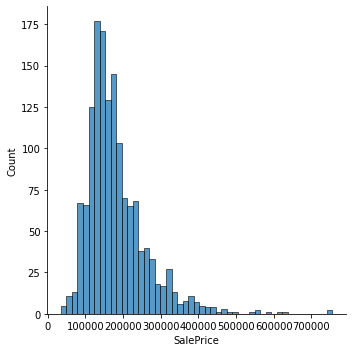

In [11]:
sns.displot(housing['SalePrice']);

- The distribution plot tells us that we have a skewed variable. 
- In fact from the statistical summary, we already saw that the mean price is about 181K while 50% of the houses were sold for less than 163K.

 it is a good practice to reduce the skew of the dataset because it can impact the accuracy of the model.

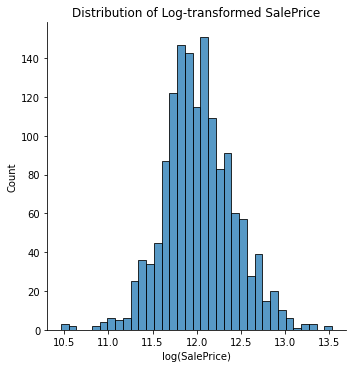

In [13]:
# Take the log to make the distribution more normal
sns.displot(np.log(housing['SalePrice']))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

What about the distribution of all the other numerical variables?

37


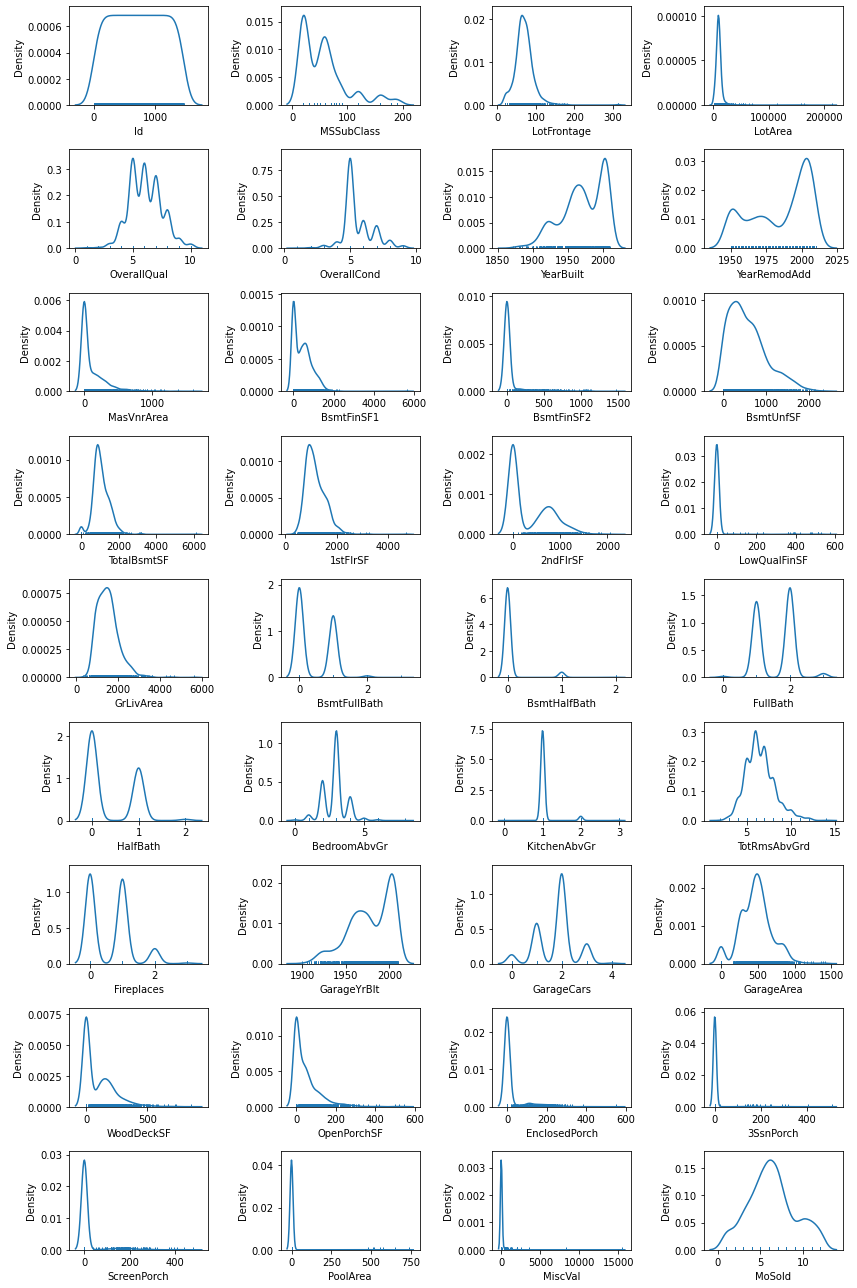

In [18]:
import warnings 
warnings.filterwarnings("ignore")

num_attributes = housing.select_dtypes(exclude='object').drop(['SalePrice'], axis=1).copy()

print(len(num_attributes.columns))

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)-1):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

## Looking for Outliers

Just-for-fun plot

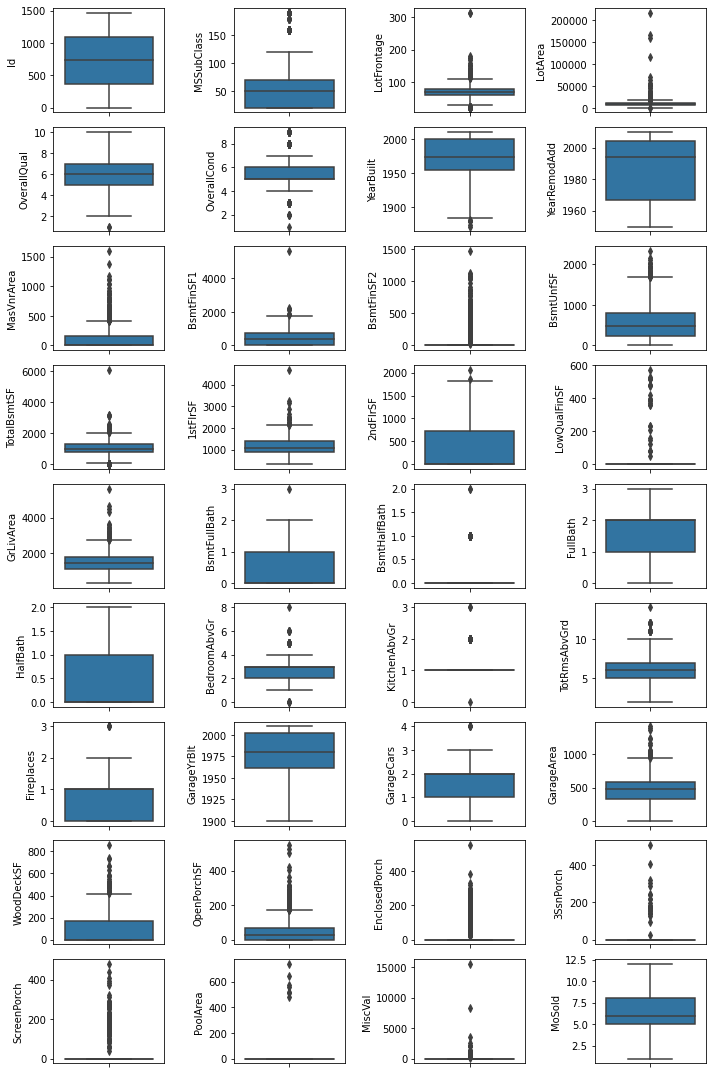

In [20]:
fig = plt.figure(figsize=(10, 15))

for i in range(len(num_attributes.columns)-1):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

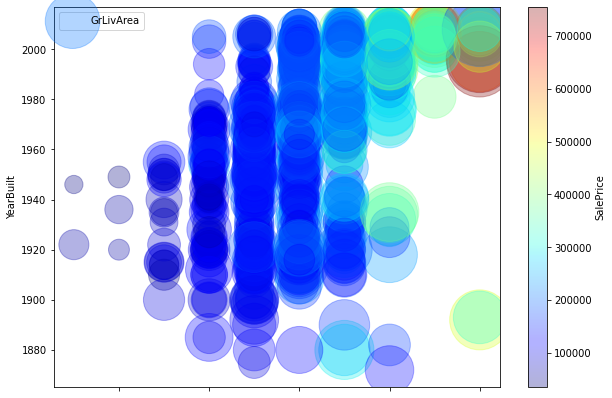

In [22]:
housing.plot(kind="scatter", x="OverallQual", y="YearBuilt",  s=housing["GrLivArea"], label="GrLivArea", 
             alpha=0.3, figsize=(10,7), c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()
plt.show()

The plot above tells us that the housing prices are very much related to the YearBuilt (y-axis) and OverallQual (x-axis).

## Correlations Among Numerical Attributes

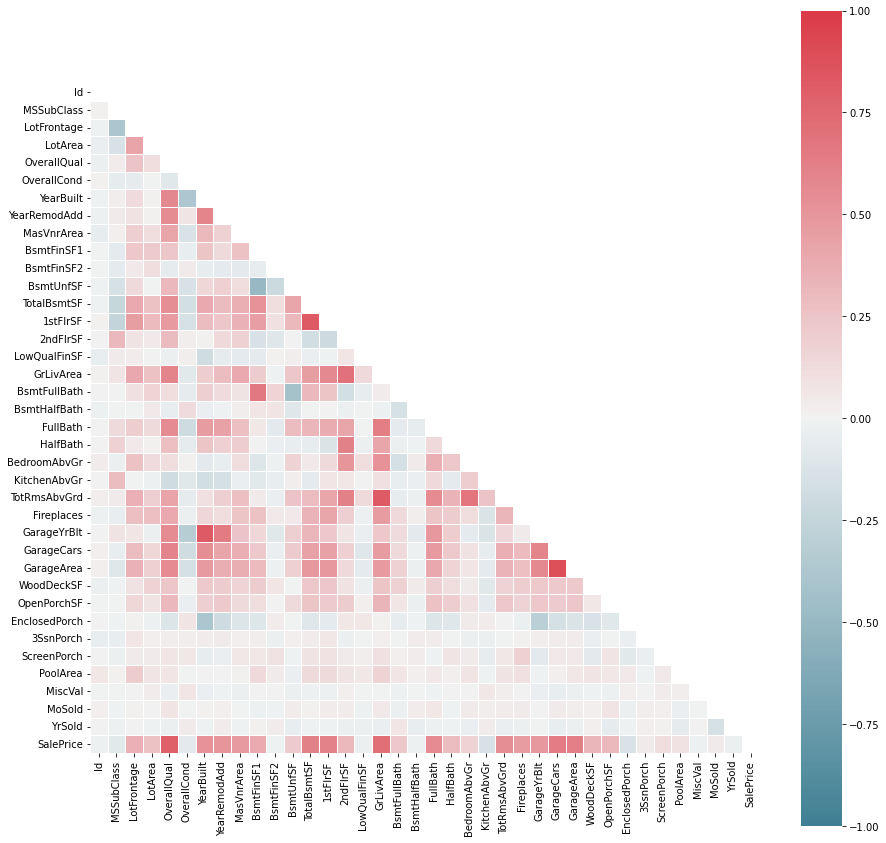

In [24]:
corr = housing.corr()

f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, vmin = -1.0, vmax = 1.0, linewidths=.5)
plt.show()

From the heatmap, we can easily see that we have some variables that are highly correlated with price (darker red) and that there are variables highly correlated among themselves as well.

In [25]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We have a lot of unique pairs of variables i.e.<br>N(N - 1)/2.<br> Joint distribution can be used to look for a relationship between all of the possible pairs, two at a time.

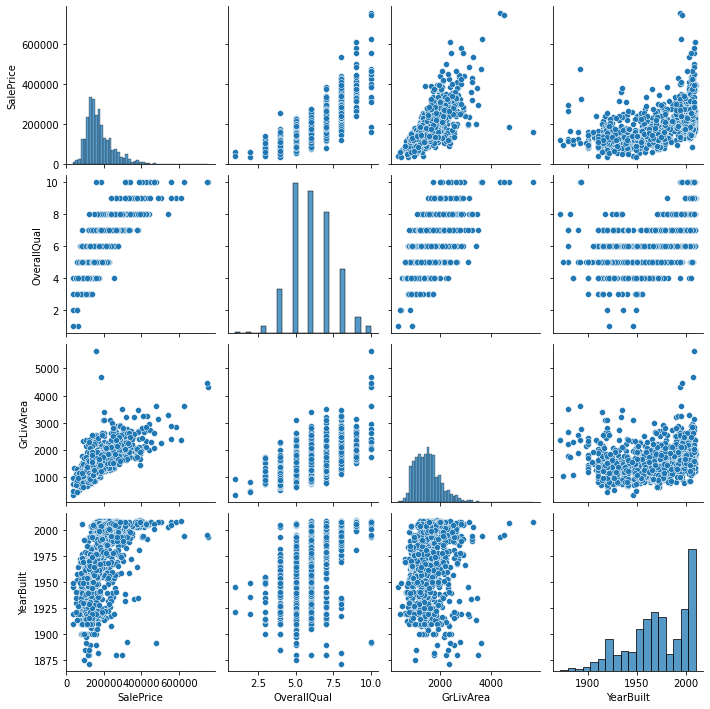

In [27]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(housing[col])
plt.show()

From the pairplots, we can clearly see how with an increase in GrLivArea the price increases as well

Let’s see what the `barplot()` and `boxplot()` methods give us.

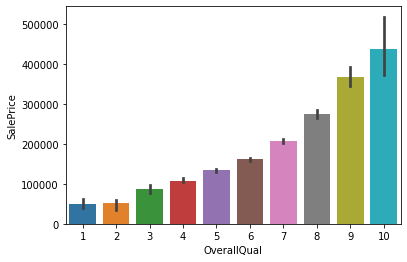

In [30]:
sns.barplot(housing.OverallQual, housing.SalePrice)
plt.show()

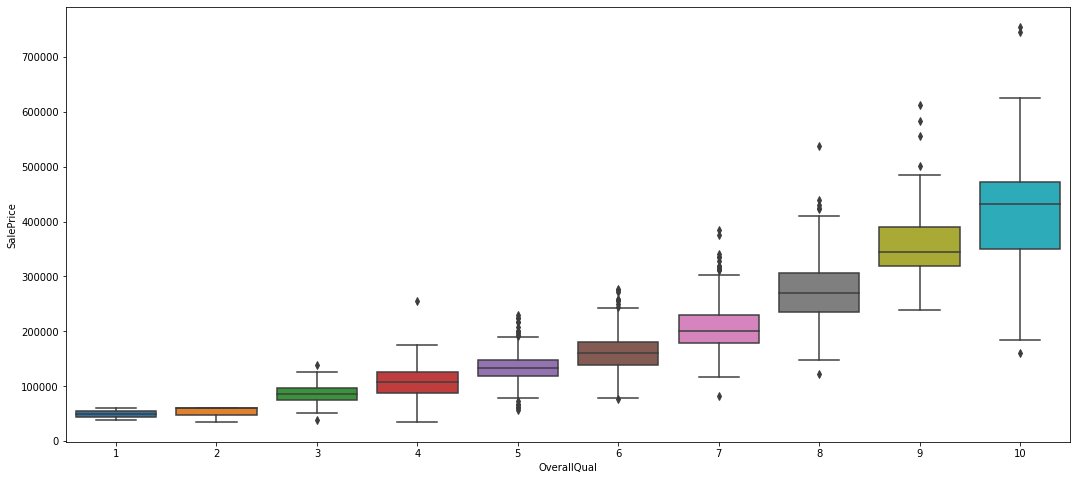

In [32]:
plt.figure(figsize=(18, 8))
sns.boxplot(x=housing.OverallQual, y=housing.SalePrice)
plt.show()


Now we can clearly see how prices change with quality, higher quality, higher price is so obvious

What about the age of the house? 

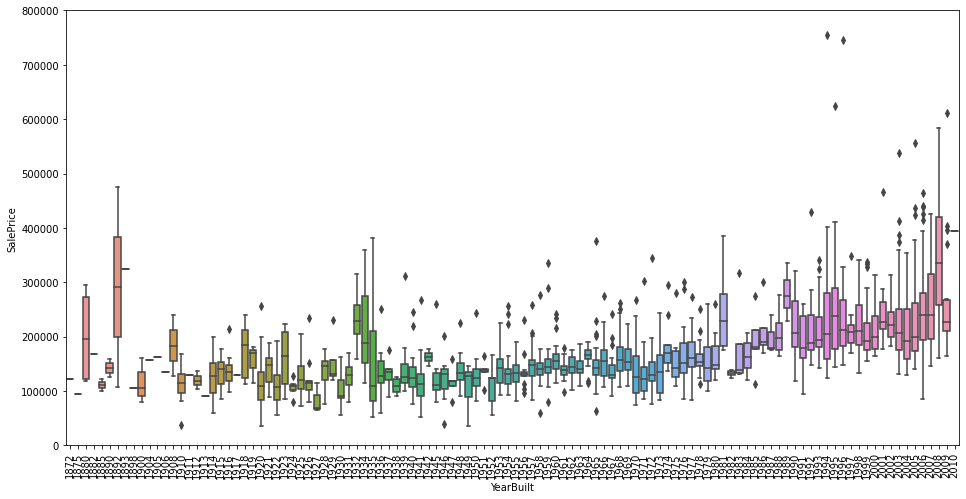

In [34]:
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

plt.xticks(rotation=90)
plt.show()

We can see that some of the very old houses are expensive, but overall the newest houses tend to have higher prices.

Both common sense and the heat map suggest that if two variables are highly correlated among themselves, only one should be sufficient for modeling purposes.

In [53]:
# Only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (corr[abs(corr) > threshold][corr != 1.0]) .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) for key in important_corrs])), columns=['attribute pair', 'correlation'])

# Sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs    

attribute pair  correlation
31      (GarageArea, GarageCars)     0.882475
36      (GarageYrBlt, YearBuilt)     0.825667
27     (GrLivArea, TotRmsAbvGrd)     0.825489
1        (1stFlrSF, TotalBsmtSF)     0.819530
23      (OverallQual, SalePrice)     0.790982
32        (GrLivArea, SalePrice)     0.708624
33         (2ndFlrSF, GrLivArea)     0.687501
34  (BedroomAbvGr, TotRmsAbvGrd)     0.676620
22    (BsmtFinSF1, BsmtFullBath)     0.649212
13   (GarageYrBlt, YearRemodAdd)     0.642277
6        (GarageCars, SalePrice)     0.640409
35         (FullBath, GrLivArea)     0.630012
3        (GarageArea, SalePrice)     0.623431
11      (2ndFlrSF, TotRmsAbvGrd)     0.616423
15      (SalePrice, TotalBsmtSF)     0.613581
24          (2ndFlrSF, HalfBath)     0.609707
20         (1stFlrSF, SalePrice)     0.605852
2      (GarageCars, OverallQual)     0.600671
29      (GrLivArea, OverallQual)     0.593007
14     (YearBuilt, YearRemodAdd)     0.592855
9      (GarageCars, GarageYrBlt)     0.588920
37      (OverallQual, YearBuilt)     0.572323
10         (1stFlrSF, GrLivArea)     0.566024
28     (GarageArea, GarageYrBlt)     0.564567
21     (GarageArea, OverallQual)     0.562022
26         (FullBath, SalePrice)     0.560664
12      (FullBath, TotRmsAbvGrd)     0.554784
5    (OverallQual, YearRemodAdd)     0.550684
4        (FullBath, OverallQual)     0.550600
18    (GarageYrBlt, OverallQual)     0.547766
19       (GarageCars, YearBuilt)     0.537850
17    (OverallQual, TotalBsmtSF)     0.537808
7      (SalePrice, TotRmsAbvGrd)     0.533723
0         (SalePrice, YearBuilt)     0.522897
8      (BsmtFinSF1, TotalBsmtSF)     0.522396
16     (BedroomAbvGr, GrLivArea)     0.521270
30     (SalePrice, YearRemodAdd)     0.507101
25      (2ndFlrSF, BedroomAbvGr)     0.502901

## Explore Categorical Attributes

In [54]:
cat_columns = housing.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


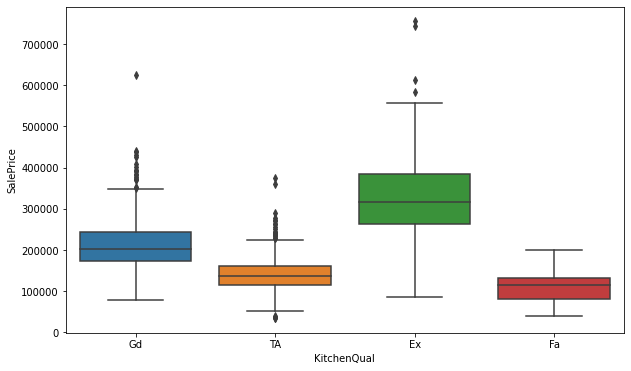

In [55]:
var = housing['KitchenQual']
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=housing.SalePrice, x=var)
plt.show()

We can now see that Ex seems to be the more expensive option while Fa brings the prices down.

What about the style of the houses? Which styles do we have and how do they impact prices?

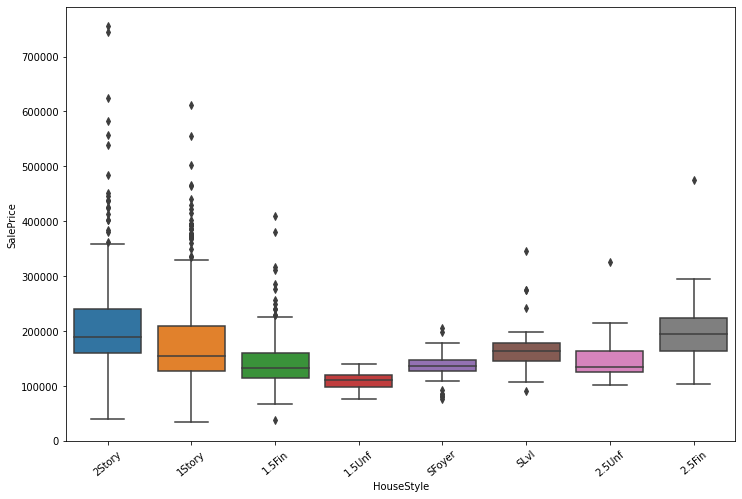

In [56]:
f, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=housing.SalePrice, x=housing.HouseStyle)
plt.xticks(rotation=40)
plt.show()

We can see that 2Story houses have the highest variability in prices and they also tend to be more expensive, while 1.5Unf are the cheapest option.

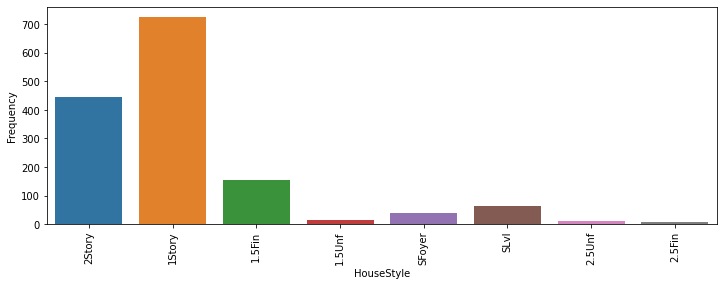

In [57]:
# Count of categories within HouseStyle attribute
fig = plt.figure(figsize=(12, 4))
sns.countplot(x='HouseStyle', data=housing)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

Now we know that most of the houses are 1Story type houses.

Exact count for each category:

In [58]:
housing["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

Let see if the style of the houses has changed over the years, so let’s plot the two variables against each other

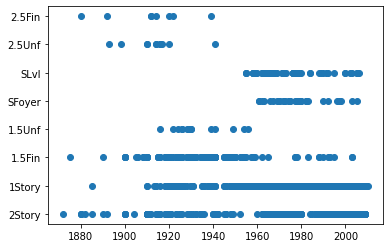

In [60]:
plt.scatter(housing['YearBuilt'],housing['HouseStyle'])
plt.show()

Now we know that 2Story and 1Story have been there for ages and they continue to be built while SFoyer and SLvl are relatively newer styles. We can also notice that 2.5Fin, 2.5Unf and 1.5Unf are deprecated styles.